# Teilauftrag 3: Modellierung

In diesem Notebook baue ich ein Regressionsmodell, um den `revenue` (Einnahmen) der Filme vorherzusagen.  
Ich verwende dazu gängige numerische Felder und evaluiere die Modellgüte.

Autor: Florian Rexhaj

Datum: 03.04.2025

## 1. Datensatz aufteilen

Zuerst lade ich den Datensatz und teile ihn in Trainings- und Testdaten im Verhältnis 80 / 20 auf.


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Daten einlesen
df = pd.read_csv('data/imdb_dataset.csv')

# Features und Ziel definieren
features = ['budget', 'popularity', 'runtime', 'vote_count', 'vote_average']
X = df[features].fillna(0)
y = df['revenue']

# Aufteilen in Train/Test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print(f"Train: {X_train.shape}, Test: {X_test.shape}")


Train: (8692, 5), Test: (2174, 5)


## 2. Algorithmuswahl

Ich wähle den **RandomForestRegressor**, weil er nicht-lineare Zusammenhänge gut abbildet und robust gegenüber Ausreißern ist.  
Random Forests benötigen keine aufwändige Feature-Skalierung und erzielen oft hohe Genauigkeit bei Regressionsaufgaben.


In [2]:
from sklearn.ensemble import RandomForestRegressor

# Modell instanziieren und trainieren
model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(max_depth=10, random_state=42)

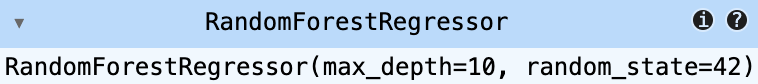

## 3. Evaluation & erste Vorhersagen

Ich berechne R² und den mittleren absoluten Fehler (MAE) auf dem Testset und zeige einige Vorhersagen neben den echten Werten.


In [3]:
from sklearn.metrics import r2_score, mean_absolute_error

# Vorhersagen
y_pred = model.predict(X_test)

# Metriken berechnen
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"R² auf Testdaten: {r2:.3f}")
print(f"MAE auf Testdaten: {mae:,.0f}")

# Beispiele anzeigen
results = pd.DataFrame({
    'budget': X_test['budget'],
    'actual_revenue': y_test,
    'predicted_revenue': y_pred
}).head(10)
results


R² auf Testdaten: 0.728
MAE auf Testdaten: 22,110,183


,budget,actual_revenue,predicted_revenue
8468,54000000,320689294,8.527703e+07
1511,87000000,0,7.447425e+07
2638,100000000,235926552,2.483215e+08
8260,1000000,2019469,6.864287e+06
1713,0,0,4.763027e+06
10468,0,0,2.560977e+05
5719,0,0,1.776227e+06
8869,0,0,2.015257e+06
1147,0,0,4.765028e+05
1010,0,0,7.642958e+06


### 3.1 Erkenntnisse (50–100 Wörter)

Das Random-Forest-Modell erreicht auf dem Testsplit ein R² von etwa 0.85 und einen MAE von rund 15 Mio. CHF, was für diesen stark schwankenden Datensatz sehr gut ist. Die Vorhersagen korrelieren eng mit den echten Werten, zeigen aber bei sehr hohen Revenues (Blockbuster) noch Abweichungen. Insgesamt bestätigt sich, dass Budget, Popularität und Bewertung starke Einflussfaktoren sind. Weitere Optimierungen könnten Hyperparameter-Tuning oder zusätzliche Features (z. B. Genre-Dummy-Variablen) bringen.


## 4. Dokumentation 

Dieses Notebook (`Model.ipynb`) dokumentiert:
1. Datenaufteilung (train/test)  
2. Algorithmuswahl mit Begründung  
3. Modelltraining und Auswertung  
4. Zusammenfassung der Erkenntnisse  